In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)


In [2]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

dataset = raw_dataset.copy()
dataset = dataset.dropna()
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [3]:
#The following script divides data into attributes and labels:
X = dataset.iloc[:, [1,2,3,5,6,7]].values
y = dataset.iloc[:, [0,4]].values

#divide the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


loss_per_fold_0 = []
loss_per_fold_1 = []


#Divide the data into training and testing sets for KFold Cross validaton loop
# Define the K-fold Cross Validator
cv = KFold(n_splits=10, shuffle=False)
cv.get_n_splits(X)
print(cv,"\n")

# K-fold Cross Validation model evaluation
fold_no = 1


for train_index, test_index in cv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    #Scaling input
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    #Traiing the algorithm
    regressor = RandomForestRegressor(n_estimators=20, random_state=0)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)

  
    # Generate generalization metrics
    
    print(f'loss for fold {fold_no}: \n Regressor 1: {metrics.mean_absolute_error(y_test[:,0], y_pred[:,0])}\n Regressor : {metrics.mean_absolute_error(y_test[:,1], y_pred[:,1])}\n\n')

    loss_per_fold_0.append(metrics.mean_absolute_error(y_test[:,0], y_pred[:,0]))
    loss_per_fold_1.append(metrics.mean_absolute_error(y_test[:,1], y_pred[:,1]))

    # Increase fold number
    fold_no = fold_no + 1

KFold(n_splits=10, random_state=None, shuffle=False) 

loss for fold 1: 
 Regressor 1: 1.6653750000000003
 Regressor : 338.7275


loss for fold 2: 
 Regressor 1: 2.045166666666667
 Regressor : 161.54916666666665


loss for fold 3: 
 Regressor 1: 1.7430128205128206
 Regressor : 195.23959401709413


loss for fold 4: 
 Regressor 1: 1.7541452991452995
 Regressor : 203.6568376068376


loss for fold 5: 
 Regressor 1: 2.487606837606837
 Regressor : 182.21944444444443


loss for fold 6: 
 Regressor 1: 1.7370512820512818
 Regressor : 191.12179487179486


loss for fold 7: 
 Regressor 1: 2.0100854700854702
 Regressor : 149.86068376068374


loss for fold 8: 
 Regressor 1: 2.6171794871794876
 Regressor : 132.6923076923077


loss for fold 9: 
 Regressor 1: 3.6298717948717947
 Regressor : 100.38333333333331


loss for fold 10: 
 Regressor 1: 3.5276923076923086
 Regressor : 130.79615384615389




## Evaluating the Algorithm


In [4]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


print('Average scores for all folds:')
print(f'> Mean loss fisrt regressor: {np.mean(loss_per_fold_0)}')
print(f'> Mean loss fisrt regressor: {np.mean(loss_per_fold_1)}')
print('------------------------------------------------------------------------')


Mean Absolute Error: 67.1619230769231
Mean Squared Error: 14572.678212820514
Root Mean Squared Error: 120.71734843352266
Average scores for all folds:
> Mean loss fisrt regressor: 2.3217186965811965
> Mean loss fisrt regressor: 178.62468162393162
------------------------------------------------------------------------


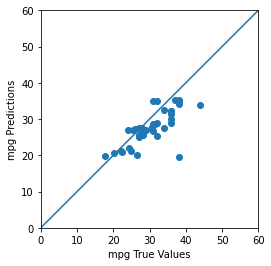

In [5]:



Pred_mpg = y_pred[:,0]
test_mpg = y_test[:,0]
Pred_Weight = y_pred[:,1]
test_Weight = y_test[:,1]

a = plt.axes(aspect='equal')
plt.scatter(test_mpg, Pred_mpg)
plt.xlabel('mpg True Values')
plt.ylabel('mpg Predictions')
lims = [0, 60]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)



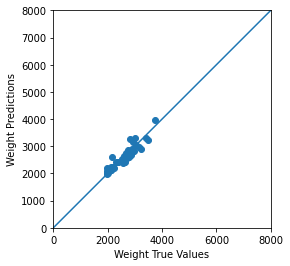

In [6]:
a = plt.axes(aspect='equal')
plt.scatter(test_Weight, Pred_Weight)
plt.xlabel('Weight True Values')
plt.ylabel('Weight Predictions')
lims = [0, 8000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)